In [1]:
library(arules)
library(arulesViz)

Warning message:
“package ‘arules’ was built under R version 4.3.3”
Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [2]:
df <- read.csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_count_vectorized.csv')
head(df)

,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,⋯,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Negative,0,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
2,Negative,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,Positive,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,Negative,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,Negative,0,0,0,1,0,0,0,1,6,⋯,0,0,1,0,0,4,0,0,0,0
6,Positive,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
binary_data <- df[,-1]

binary_data[binary_data > 0] <- 1

head(binary_data)

,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,⋯,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,1,0,⋯,0,0,1,0,0,1,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# If binary_data is a data frame, convert it to a matrix first
binary_matrix <- as.matrix(binary_data)

# Ensure the matrix is numeric (0/1)
binary_matrix[binary_matrix > 0] <- 1

# Convert the binary matrix into a transaction object
transactions <- as(binary_matrix, "transactions")

# Check the summary of transactions
summary(transactions)

transactions as itemMatrix in sparse format with
 919 rows (elements/itemsets/transactions) and
 5000 columns (items) and a density of 0.05612427 

most frequent items:
        ai       also        new technology       like    (Other) 
       748        679        674        552        545     254693 

element (itemset/transaction) length distribution:
sizes
   0    1    3    4   10   12   14   15   16   20   21   23   27   29   31   33 
   1    1    3    1    1    2    2    1    2    2    2    2    4    1    1    1 
  34   37   40   41   43   45   54   55   58   59   60   61   64   68   69   71 
   1    2    1    1    1    1    1    1    1    2    1    3    1    1    1    2 
  74   77   82   84   85   86   87   88   89   90   91   92   93   94   97   98 
   2    1    1    1    1    1    1    2    1    1    2    2    1    3    1    2 
 100  101  102  103  104  107  108  110  111  112  113  114  115  117  118  119 
   2    1    1    2    2    1    3    1    2    2    1    2    4    2   

In [49]:
library(arules)

# Extract first few transactions
subset_transactions <- head(transactions)

# Convert to a dataframe
transactions_df <- as(subset_transactions, "list")  # Convert transactions to a list
transactions_df <- data.frame(ID = seq_along(transactions_df), 
                              Items = sapply(transactions_df, function(x) paste(sort(x), collapse = ", ")))

# Print the dataframe
transactions_df

ID,Items
<int>,<chr>
1,"able, abuse, accountability, accused, activities, advanced, agencies, agenda, aid, aimed, aims, aligns, alleged, alliance, along, already, also, american, appointed, are, argued, argues, argument, arrived, audit, authority, away, battle, become, big, billion, billions, block, boost, breaking, build, bureaucracy, bureaucratic, call, calling, centres, challenge, change, changes, charged, china, cia, cities, citing, citizens, civil, collectively, commission, competitive, conflict, consolidated, contrast, controlled, countries, country, course, coverage, crisis, current, declared, decline, delivering, democracy, democratic, designed, different, directed, distributed, dollars, dominance, donald, duty, eastern, economic, economy, edge, effective, effort, either, elected, election, elections, elite, elon, enforcement, enhance, ensuring, entire, established, europe, even, every, exists, experience, exposed, extent, faces, facilitating, facing, failures, family, far, federal, figures, financial, find, first, foreign, found, foundation, founding, fraud, function., fundamental, funds, general, giants, global, government, governments, grant, groups, growth, hand, hands, health, history, holds, hubs, ignore, implement, including, industrial, inequality, inflation, infrastructure, instead, institutional, institutions, integrity, interest, interventions, investigation, investment, japan, judge, korea, laid, law, leader, leadership, leading, led, like, logic, losing, mainstream, maintaining, major, mandates, many, massive, meaningful, media, merely, michigan, middle, military, million, mission, misuse, modern, motivated, musk, must, nation, national, nations, nearly, new, nothing, often, operate, orders, others, pentagon, people, policies, political, politics, positioned, power, powerful, powers, president, presidential, principles, progress, projects, prosperity, protect, protecting, provided, proving, public, radical, raises, rapidly, rather, reality, recognized, recognizing, reduced, referencing, reform, reforms, regulations, representative, representatives, resistance, rest, restructuring, result, rising, role, safeguarding, secure, seen, sending, separate, september, serious, serve, serves, sets, shaping, shifting, situation, south, sparked, stability, state, stateoftheart, strong, structural, sustain, system, systemic, tax, ties, time, towards, trade, trillion, truly, trump, unable, unauthorized, unemployment, unprecedented, us, usa, usaid, vision, vote, war, waste, wealth, welfare, well, wellbeing, whether, within, witnessing, work, world, worse, york"
2,"administration, adviser, agency, among, around, causing, chaos, continues, country, dangerous, day, department, donald, elon, employment, employs, energy, far, fewer, friday, including, laid, later, layoffs, many, materials, musk, national, notice, nuclear, number, offices, part, people, places, president, reuters, russia, said, secure, security, sent, sources, spokesperson, staff, suddenly, sunday, told, trump, ukraine, uncertain, us, war, washington, weapons, wider, work, workers, works, world"
3,"associate, away, category, coach, conference, david, division, final, former, head, joined, last, may, men, overall, play, read, record, run, seconds, sports, state, team, went, win, year, yesterday"
4,"also, another, arrived, average, bad, begin, behind, better, biggest, camp, concerning, concerns, day, declined, due, enough, field, full, games, george, gets, given, going, heres, hes, hit, home, injuries, judge, lack, last, latest, league, likely, lineup, losing, manager, mark, massive, may, means, mentioned, might, million, miss, missing, monitor, much, new, news, nothing, officially, opening, percent, played, players, position, primary, producer, promising, prospect, protection, questions, raised, ready, reported, reporters, revealed, role, runs, say, schedule, season, seem, seven, something, spending, spring, start, sunday, teams, throughout, time, told, top, tr

In [22]:
# Apply the Apriori algorithm to find frequent itemsets
rules <- apriori(transactions, parameter = list(support = 0.3, confidence = 0.7, maxlen = 2, target = "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 275 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5000 item(s), 919 transaction(s)] done [0.07s].
sorting and recoding items ... [75 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2

Warning message in apriori(transactions, parameter = list(support = 0.3, confidence = 0.7, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.00s].
writing ... [135 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


#### Top 15 Support

In [58]:
# Convert the top 15 rules sorted by confidence into a data frame
top_rules_support_df <- as.data.frame(inspect(head(top_rules_support, 15)))

# Print the dataframe properly formatted
print(top_rules__support_df, row.names = FALSE)

     lhs             rhs    support   confidence coverage  lift     count
[1]  {}           => {ai}   0.8139282 0.8139282  1.0000000 1.000000 748  
[2]  {}           => {also} 0.7388466 0.7388466  1.0000000 1.000000 679  
[3]  {}           => {new}  0.7334059 0.7334059  1.0000000 1.000000 674  
[4]  {new}        => {ai}   0.6311208 0.8605341  0.7334059 1.057261 580  
[5]  {ai}         => {new}  0.6311208 0.7754011  0.8139282 1.057261 580  
[6]  {also}       => {ai}   0.6235038 0.8438881  0.7388466 1.036809 573  
[7]  {ai}         => {also} 0.6235038 0.7660428  0.8139282 1.036809 573  
[8]  {also}       => {new}  0.5756257 0.7790869  0.7388466 1.062286 529  
[9]  {new}        => {also} 0.5756257 0.7848665  0.7334059 1.062286 529  
[10] {technology} => {ai}   0.5233950 0.8713768  0.6006529 1.070582 481  
[11] {like}       => {ai}   0.5190424 0.8752294  0.5930359 1.075315 477  
[12] {like}       => {also} 0.4853101 0.8183486  0.5930359 1.107603 446  
[13] {technology} => {new}  0.4722524 

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'print': object 'top_rules__support_df' not found


#### Top 15 Confidence

In [52]:
# Convert the top 15 rules sorted by confidence into a data frame
top_rules_df <- as.data.frame(inspect(head(top_rules_confidence, 15)))

# Print the dataframe properly formatted
print(top_rules_df, row.names = FALSE)

     lhs               rhs            support   confidence coverage  lift    
[1]  {artificial}   => {intelligence} 0.3710555 0.9798851  0.3786725 2.185714
[2]  {artificial}   => {ai}           0.3601741 0.9511494  0.3786725 1.168591
[3]  {intelligence} => {ai}           0.4200218 0.9368932  0.4483134 1.151076
[4]  {use}          => {ai}           0.3819369 0.9285714  0.4113166 1.140852
[5]  {potential}    => {ai}           0.3438520 0.9159420  0.3754081 1.125335
[6]  {technologies} => {ai}           0.3057671 0.9093851  0.3362350 1.117279
[7]  {impact}       => {ai}           0.3101197 0.9076433  0.3416757 1.115139
[8]  {future}       => {ai}           0.3688792 0.9064171  0.4069641 1.113633
[9]  {employees}    => {ai}           0.3351469 0.9005848  0.3721436 1.106467
[10] {may}          => {ai}           0.3079434 0.8984127  0.3427639 1.103798
[11] {help}         => {ai}           0.3525571 0.8901099  0.3960827 1.093598
[12] {development}  => {ai}           0.3558215 0.8885870  0.400

#### Top 15 Lift

In [53]:
# Convert the top 15 rules sorted by lift into a data frame
top_rules_lift_df <- as.data.frame(inspect(head(top_rules_lift, 15)))

# Print the dataframe properly formatted
print(top_rules_lift_df, row.names = FALSE)

     lhs               rhs            support   confidence coverage  lift    
[1]  {artificial}   => {intelligence} 0.3710555 0.9798851  0.3786725 2.185714
[2]  {intelligence} => {artificial}   0.3710555 0.8276699  0.4483134 2.185714
[3]  {many}         => {one}          0.3035909 0.7063291  0.4298150 1.298233
[4]  {people}       => {like}         0.3003264 0.7263158  0.4134929 1.224742
[5]  {use}          => {technology}   0.3025027 0.7354497  0.4113166 1.224417
[6]  {data}         => {technology}   0.3852013 0.7329193  0.5255713 1.220204
[7]  {need}         => {like}         0.3340588 0.7223529  0.4624592 1.218059
[8]  {industry}     => {technology}   0.3046790 0.7216495  0.4221980 1.201442
[9]  {make}         => {like}         0.3166485 0.7063107  0.4483134 1.191008
[10] {one}          => {like}         0.3830250 0.7040000  0.5440696 1.187112
[11] {intelligence} => {technology}   0.3166485 0.7063107  0.4483134 1.175905
[12] {artificial}   => {ai}           0.3601741 0.9511494  0.378

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


Warning message:
“Too many rules supplied. Only plotting the best 100 using ‘lift’ (change control parameter max if needed).”


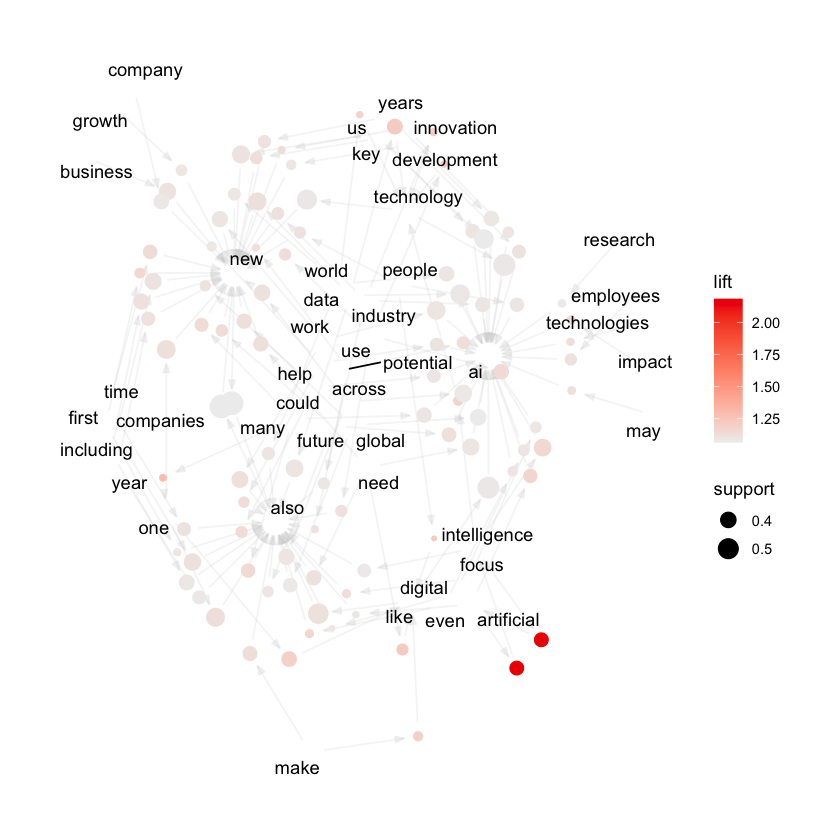

In [26]:
library(arulesViz)
plot(rules, method = "graph", control = list(type = "items"))

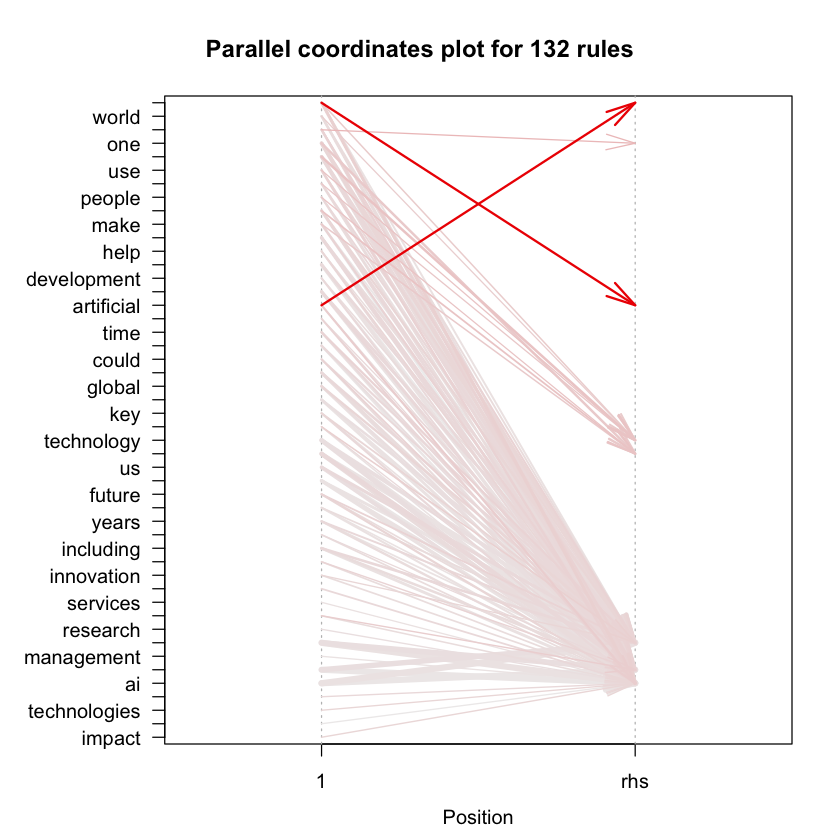

In [50]:
plot(rules, method = "paracoord", control = list(reorder = TRUE))

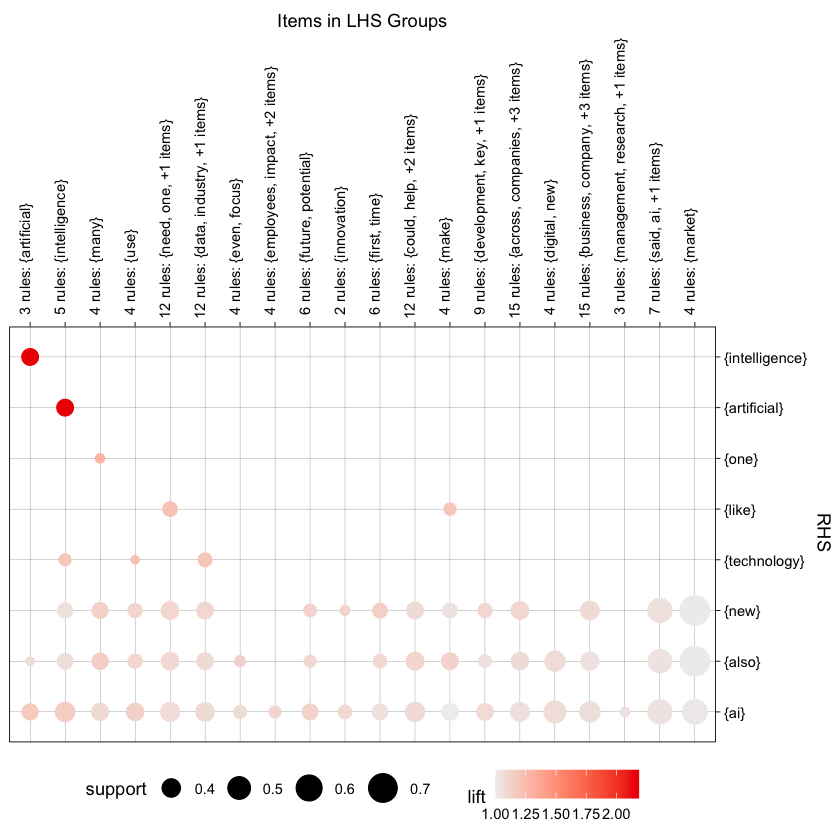

In [51]:
library(arulesViz)

# Plot association rules using a grouped matrix method
plot(rules, method = "grouped")